In [148]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from scipy.stats import multivariate_normal

In [8]:
K_true_cluster = 2
K_model_cluster = 2
feature_dim =2
iter_max = 10
N_seed = 100

In [70]:
pi_ratio = np.array([1,1])
pi = pi_ratio/pi_ratio.sum()
N_distribution = N_seed*pi_ratio
N_total = N_distribution.sum()

In [117]:
mu_true = np.array([[0,0],
                    [1,1]])
mu_true

array([[0, 0],
       [1, 1]])

In [118]:
sigma0 = np.array([[0.01,0],[0,0.01]])
sigma1 = np.array([[0.02,0],[0,0.02]])
sigma = np.array([sigma0,sigma1])
sigma


array([[[0.01, 0.  ],
        [0.  , 0.01]],

       [[0.02, 0.  ],
        [0.  , 0.02]]])

In [119]:
data = np.random.multivariate_normal(mu_true[0],sigma[0],size=N_distribution[0])
data = data[np.newaxis,:,:]
new_data = np.random.multivariate_normal(mu_true[1],sigma[1],size=N_distribution[1])
new_data = new_data[np.newaxis,:,:]
data = np.append(data,new_data,axis=0)
data

array([[[-7.45875373e-02, -1.26799376e-01],
        [-8.48496179e-02,  4.60669149e-02],
        [-6.38406809e-02, -7.78173364e-02],
        [ 4.48173903e-02,  2.38130775e-02],
        [-2.85393666e-02,  6.17569213e-02],
        [-2.16589386e-01, -8.03951326e-02],
        [ 1.97600922e-02, -1.12761819e-01],
        [ 1.59194887e-01,  1.66810951e-01],
        [-7.01276303e-02, -7.45962699e-02],
        [ 1.22398614e-02, -2.59612792e-02],
        [-1.89546240e-02,  1.54755544e-02],
        [-1.03931923e-01, -4.14176190e-02],
        [-1.18598423e-01,  1.39856222e-01],
        [ 1.11153242e-01, -2.54443975e-02],
        [ 7.24208867e-02, -6.34732211e-03],
        [-1.58349371e-01, -6.03129817e-03],
        [ 1.28300081e-01,  1.02269066e-01],
        [-3.00344872e-02, -2.53078107e-02],
        [-1.02619751e-02, -3.07701697e-02],
        [ 2.88917036e-01, -4.93399094e-02],
        [ 7.97033276e-02, -4.10206193e-03],
        [-1.42122383e-01, -3.12182959e-02],
        [-1.17139852e-01,  2.400

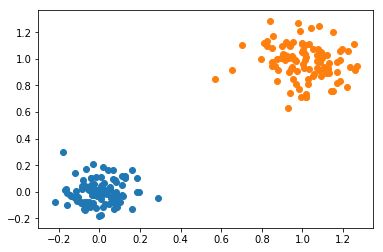

In [120]:
plt.scatter(data[0,:,0],data[0,:,1],label='data_0')
plt.scatter(data[1,:,0],data[1,:,1],label='data_1')

In [121]:
data_total = data.reshape(-1,feature_dim)
data_total

array([[-7.45875373e-02, -1.26799376e-01],
       [-8.48496179e-02,  4.60669149e-02],
       [-6.38406809e-02, -7.78173364e-02],
       [ 4.48173903e-02,  2.38130775e-02],
       [-2.85393666e-02,  6.17569213e-02],
       [-2.16589386e-01, -8.03951326e-02],
       [ 1.97600922e-02, -1.12761819e-01],
       [ 1.59194887e-01,  1.66810951e-01],
       [-7.01276303e-02, -7.45962699e-02],
       [ 1.22398614e-02, -2.59612792e-02],
       [-1.89546240e-02,  1.54755544e-02],
       [-1.03931923e-01, -4.14176190e-02],
       [-1.18598423e-01,  1.39856222e-01],
       [ 1.11153242e-01, -2.54443975e-02],
       [ 7.24208867e-02, -6.34732211e-03],
       [-1.58349371e-01, -6.03129817e-03],
       [ 1.28300081e-01,  1.02269066e-01],
       [-3.00344872e-02, -2.53078107e-02],
       [-1.02619751e-02, -3.07701697e-02],
       [ 2.88917036e-01, -4.93399094e-02],
       [ 7.97033276e-02, -4.10206193e-03],
       [-1.42122383e-01, -3.12182959e-02],
       [-1.17139852e-01,  2.40027926e-03],
       [-1.

In [122]:

mean_original= data_total.mean(axis=0)
mean_original

array([0.50291975, 0.48797135])

In [124]:
cov_original = np.cov(data_total.T)
cov_original

array([[0.26925481, 0.24791656],
       [0.24791656, 0.25398419]])

In [175]:
mu = np.random.multivariate_normal(mean_original,cov_original,K_model_cluster)
mu

array([[0.33484884, 0.21381992],
       [1.16055679, 1.19950134]])

In [128]:
pi = np.full(K_model_cluster,1./K_model_cluster)
pi

array([0.5, 0.5])

In [154]:
cov = np.diag(cov_original.diagonal())
cov = cov.reshape(-1,feature_dim,feature_dim)
for i in range(K_model_cluster-1):
    cov = np.append(cov,np.diag(cov_original.diagonal()).reshape(-1,feature_dim,feature_dim),axis=0)
cov

array([[[0.26925481, 0.        ],
        [0.        , 0.25398419]],

       [[0.26925481, 0.        ],
        [0.        , 0.25398419]]])

In [232]:
N_nk = multivariate_normal(mu[0],cov[0]).pdf(data_total)
N_nk = N_nk.reshape(-1,1)
for i in range(1,K_model_cluster):
    N_nk_temp = multivariate_normal(mu[i],cov[i]).pdf(data_total)
    N_nk_temp = N_nk_temp.reshape(-1,1)
    N_nk = np.append(N_nk,N_nk_temp,axis=1)

pi_N_nk = N_nk*pi

sum_pi_N_nk = pi_N_nk.sum(axis=1).reshape(-1,1)

gamma_nk = pi_N_nk/sum_pi_N_nk

N_k = gamma_nk.sum(axis=0)

mu = np.average(data_total,weights=gamma_nk[:,0],axis=0)
for i in range(1,K_model_cluster):
    mu = np.append(mu,np.average(data_total,weights=gamma_nk[:,i],axis=0))

mu = mu.reshape(-1,K_model_cluster)
mu

array([[ 1.00809095,  0.97801001],
       [-0.00225146, -0.00206731]])

In [233]:

cov = np.diag(np.average((data_total-mu[0])**2,weights=gamma_nk[:,0],axis=0))
cov  = cov.reshape(-1,feature_dim,feature_dim)
for i in range(1,K_model_cluster):
    cov = np.append(cov,np.diag(np.average((data_total-mu[i])**2,weights=gamma_nk[:,i],axis=0)).reshape(-1,feature_dim,feature_dim),axis=0)
cov

array([[[0.01676004, 0.        ],
        [0.        , 0.01708255]],

       [[0.00866114, 0.        ],
        [0.        , 0.00807021]]])

In [234]:
pi = N_k/N_total
pi

array([0.5, 0.5])

In [235]:
log_P = np.log(pi_N_nk.sum(axis=1)).sum()
log_P

180.1421665835079

In [236]:
gamma_nk

array([[3.47163877e-31, 1.00000000e+00],
       [2.57297357e-27, 1.00000000e+00],
       [7.68296505e-30, 1.00000000e+00],
       [1.48419544e-24, 1.00000000e+00],
       [1.68369343e-25, 1.00000000e+00],
       [2.18035100e-33, 1.00000000e+00],
       [1.80275069e-28, 1.00000000e+00],
       [2.58992034e-17, 1.00000000e+00],
       [6.37196029e-30, 1.00000000e+00],
       [1.12895952e-26, 1.00000000e+00],
       [1.84316382e-26, 1.00000000e+00],
       [5.79044956e-30, 1.00000000e+00],
       [1.57829511e-25, 1.00000000e+00],
       [6.42800772e-24, 1.00000000e+00],
       [1.49323786e-24, 1.00000000e+00],
       [2.33313366e-30, 1.00000000e+00],
       [4.33164611e-20, 1.00000000e+00],
       [9.30181654e-28, 1.00000000e+00],
       [2.21600606e-27, 1.00000000e+00],
       [5.77953385e-19, 1.00000000e+00],
       [2.71862432e-24, 1.00000000e+00],
       [1.31475809e-30, 1.00000000e+00],
       [3.32414513e-29, 1.00000000e+00],
       [1.78586528e-30, 1.00000000e+00],
       [6.332308